# Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load data

In [5]:
dataset = pd.read_excel("./merc.xlsx")
dataset

year  price transmission  mileage  tax   mpg  engineSize
0      2005   5200    Automatic    63000  325  32.1         1.8
1      2017  34948    Automatic    27000   20  61.4         2.1
2      2016  49948    Automatic     6200  555  28.0         5.5
3      2016  61948    Automatic    16000  325  30.4         4.0
4      2016  73948    Automatic     4000  325  30.1         4.0
...     ...    ...          ...      ...  ...   ...         ...
13114  2020  35999    Automatic      500  145  55.4         2.0
13115  2020  24699    Automatic     2500  145  55.4         2.0
13116  2019  30999    Automatic    11612  145  41.5         2.1
13117  2019  37990    Automatic     2426  145  45.6         2.0
13118  2019  54999    Automatic     2075  145  52.3         2.9

[13119 rows x 7 columns]

In [6]:
dataset.describe()

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [7]:
dataset.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


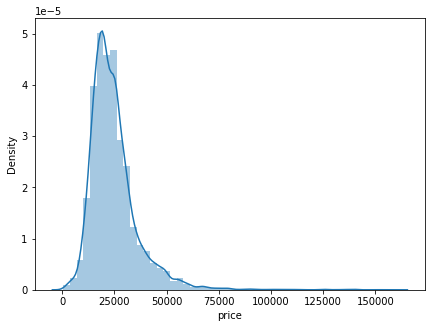

In [8]:
plt.figure(figsize=(7, 5))
sns.distplot(dataset["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

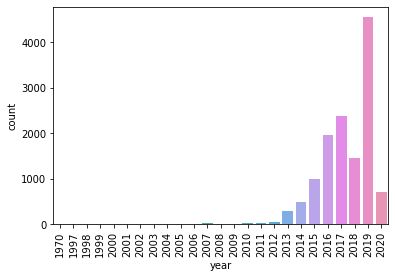

In [9]:
sns.countplot(dataset["year"])
plt.xticks(rotation=90)
#sns.countplot(y=dataset["year"])

In [10]:
dataset.corr()

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.520712 -0.738027  0.012480 -0.094626   -0.142147
price       0.520712  1.000000 -0.537214  0.268717 -0.438445    0.516126
mileage    -0.738027 -0.537214  1.000000 -0.160223  0.202850    0.063652
tax         0.012480  0.268717 -0.160223  1.000000 -0.513742    0.338341
mpg        -0.094626 -0.438445  0.202850 -0.513742  1.000000   -0.339862
engineSize -0.142147  0.516126  0.063652  0.338341 -0.339862    1.000000

In [11]:
dataset.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

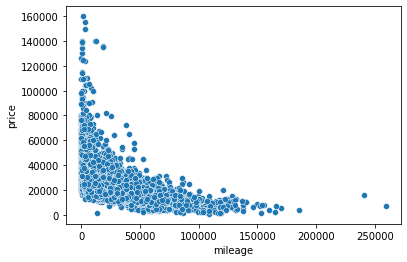

In [12]:
sns.scatterplot(x="mileage", y="price", data=dataset)

In [13]:
dataset.sort_values("price", ascending=False).head(20)

year   price transmission  mileage  tax   mpg  engineSize
6199   2020  159999    Semi-Auto     1350  145  21.4         4.0
10044  2020  154998    Automatic     3000  150  21.4         4.0
5      2011  149948    Automatic     3000  570  21.4         6.2
8737   2019  140319    Semi-Auto      785  150  22.1         4.0
6386   2018  139995    Semi-Auto    13046  145  21.4         4.0
8      2019  139948    Automatic    12000  145  21.4         4.0
9133   2019  139559    Semi-Auto     1000  145  22.1         4.0
8821   2020  138439    Semi-Auto     1000  145  22.1         4.0
5902   2018  135771    Semi-Auto    19000  145  21.4         4.0
7864   2018  135124    Semi-Auto    18234  150  21.4         4.0
8673   2019  134219    Semi-Auto     1000  145  24.8         4.0
6210   2019  129990    Automatic     1000  145  24.8         4.0
4759   2019  126000    Automatic      250  145  24.6         4.0
2647   2019  125796    Automatic      637  145  24.8         4.0
6223   2019  124999    Automatic     1500  145  31.7         4.0
4094   2019  124366    Semi-Auto      880  145  24.8         4.0
2629   2019  123846    Semi-Auto     2951  145  22.1         4.0
7134   2019  115359    Semi-Auto     1000  145  30.1         4.0
9159   2019  114199    Semi-Auto      891  145  22.6         4.0
1980   2019  109995    Semi-Auto     4688  150  31.7         4.0

In [14]:
len(dataset) * 0.01

131.19

In [15]:
# dataset.drop(dataset[dataset["price"] > 75000].index,  inplace=True)
# dataset.describe()

In [16]:
induced_df = dataset.sort_values("price", ascending=False).iloc[131:]
induced_df

year  price transmission  mileage  tax   mpg  engineSize
6177   2019  65990    Semi-Auto     5076  150  30.4         3.0
5779   2020  65990    Semi-Auto      999  145  28.0         4.0
3191   2020  65980    Semi-Auto     3999  145  28.0         4.0
4727   2019  65000    Semi-Auto     3398  145  27.2         4.0
8814   2019  64999    Semi-Auto      119  145  40.9         3.0
...     ...    ...          ...      ...  ...   ...         ...
11549  2002   1495    Automatic    13800  305  39.8         2.7
12594  2004   1495       Manual   119000  300  34.5         1.8
11765  2000   1490    Automatic    87000  265  27.2         3.2
12008  2010   1350       Manual   116126  145  54.3         2.0
11816  2003    650       Manual   109090  235  40.0         1.4

[12988 rows x 7 columns]

In [17]:
induced_df.describe()

year         price        mileage           tax           mpg  \
count  12988.000000  12988.000000   12988.000000  12988.000000  12988.000000   
mean    2017.281876  24074.926933   22132.741146    129.689714     55.437142   
std        2.228515   9866.224575   21196.776401     65.183076     15.025999   
min     1970.000000    650.000000       1.000000      0.000000      1.100000   
25%     2016.000000  17357.500000    6322.000000    125.000000     45.600000   
50%     2018.000000  22299.000000   15369.500000    145.000000     56.500000   
75%     2019.000000  28706.000000   31982.250000    145.000000     64.200000   
max     2020.000000  65990.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  12988.000000  
mean       2.050901  
std        0.532596  
min        0.000000  
25%        1.675000  
50%        2.000000  
75%        2.100000  
max        6.200000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


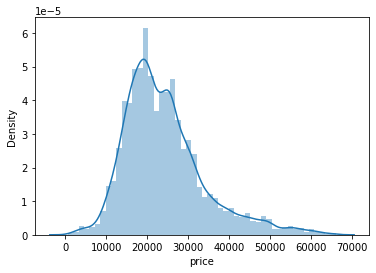

In [18]:
sns.distplot(induced_df["price"])

In [19]:
dataset.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [20]:
induced_df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [21]:
induced_df[induced_df.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [22]:
induced_df2 = induced_df[induced_df.year != 1970]
induced_df2.head()

year  price transmission  mileage  tax   mpg  engineSize
6177  2019  65990    Semi-Auto     5076  150  30.4         3.0
5779  2020  65990    Semi-Auto      999  145  28.0         4.0
3191  2020  65980    Semi-Auto     3999  145  28.0         4.0
4727  2019  65000    Semi-Auto     3398  145  27.2         4.0
8814  2019  64999    Semi-Auto      119  145  40.9         3.0

In [23]:
induced_df3 = induced_df2.drop("transmission", axis=1)
df = induced_df3
df

year  price  mileage  tax   mpg  engineSize
6177   2019  65990     5076  150  30.4         3.0
5779   2020  65990      999  145  28.0         4.0
3191   2020  65980     3999  145  28.0         4.0
4727   2019  65000     3398  145  27.2         4.0
8814   2019  64999      119  145  40.9         3.0
...     ...    ...      ...  ...   ...         ...
11549  2002   1495    13800  305  39.8         2.7
12594  2004   1495   119000  300  34.5         1.8
11765  2000   1490    87000  265  27.2         3.2
12008  2010   1350   116126  145  54.3         2.0
11816  2003    650   109090  235  40.0         1.4

[12987 rows x 6 columns]

# Data preprocessing

In [24]:
y = df["price"].values
x = df.drop("price", axis=1).values

In [25]:
print(x.shape, y.shape)

(12987, 5) (12987,)


## train-test split

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(len(x_train))
print(len(x_test))

9090
3897


## scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# Creating model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
x_train.shape

(9090, 5)

In [30]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

# Train model

In [31]:
hist = model.fit(x=x_train, y=y_train,
                 validation_data=(x_test, y_test),
                 batch_size=250, epochs=500)

Epoch 1/500
37/37 [==============================] - 1s 8ms/step - loss: 672142656.0000 - val_loss: 688097664.0000
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 672112576.0000 - val_loss: 688042176.0000
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 671998528.0000 - val_loss: 687830272.0000
Epoch 4/500
37/37 [==============================] - 0s 4ms/step - loss: 671613184.0000 - val_loss: 687165248.0000
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 670495488.0000 - val_loss: 685342592.0000
Epoch 6/500
37/37 [==============================] - 0s 4ms/step - loss: 667617664.0000 - val_loss: 680899584.0000
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 661148544.0000 - val_loss: 671521856.0000
Epoch 8/500
37/37 [==============================] - 0s 3ms/step - loss: 648276992.0000 - val_loss: 653828224.0000
Epoch 9/500
37/37 [==============================] - 0s 3ms/step - loss: 6252400

# Evaluate model

In [32]:
loss_df = pd.DataFrame(model.history.history)
#lossData = pd.DataFrame(hist.history)
loss_df

loss     val_loss
0    672142656.0  688097664.0
1    672112576.0  688042176.0
2    671998528.0  687830272.0
3    671613184.0  687165248.0
4    670495488.0  685342592.0
..           ...          ...
495   18087258.0   19483394.0
496   18059396.0   19473536.0
497   18072226.0   19473350.0
498   18088404.0   19467100.0
499   18065252.0   19461642.0

[500 rows x 2 columns]

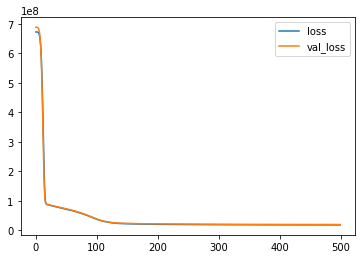

In [33]:
loss_df.plot()


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
predict_arr = model.predict(x_test)
predict_arr

array([[21755.9  ],
       [22087.795],
       [25451.652],
       ...,
       [26425.24 ],
       [15743.716],
       [24789.535]], dtype=float32)

In [36]:
mean_absolute_error(y_test, predict_arr)

3135.916074859016

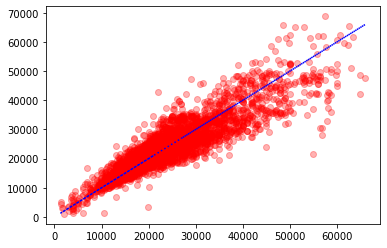

In [37]:
plt.scatter(y_test, predict_arr, color="red", alpha=0.3)
plt.plot(y_test, y_test, "b:")

# Predictions

In [38]:
df.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [39]:
new_car_series = df.drop("price", axis=1).iloc[5]
new_car_arr = scalar.transform(new_car_series.values.reshape(1, 5))

In [40]:
model.predict(new_car_arr)

array([[61696.62]], dtype=float32)